In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import joblib

In [2]:
df = pd.read_csv("Miami_Heat_Playoff_Data_csv.csv")

game_num_encoded = pd.get_dummies(df["game_num"], prefix="game")

# Add the encoded columns to the original DataFrame
df = pd.concat([df, game_num_encoded], axis=1)


for i, col in enumerate(df.columns):
    print(f"{i}: {col}")
    
print(len(df))
display(df.head())

0: Year
1: game_num
2: heat_top_3_pts
3: opponent_top_3_pts
4: heat_pts
5: opponent_pts
6: Spread
7: heat_fg_perc
8: opponent_fg_pct
9: heat_3pt_perc
10: opponent_3pt_perc
11: heat_ft_perc
12: opponent_ft_perc
13: heat_off_reb
14: opponent_off_reb
15: heat_def_reb
16: opponent_def_reb
17: heat_assists
18: opponent_assists
19: heat_blocks
20: opponent_blocks
21: heat_steals
22: opponent_steals
23: heat_turnovers
24: opponent_turnovers
25: heat_pts_paint
26: opponent_pts_paint
27: heat_fouls
28: opponent_fouls
29: location
30: heat_rest_days
31: time
32: opponent_rest_days
33: heat_num_injuries
34: heat_signif_injuries
35: opponent_num_injuries
36: opponent_signif_injuries
37: heat_winning_streak
38: opponent_winning_streak
39: opponent
40: win_rank
41: pts_rank
42: reb_rank
43: ast_rank
44: plus_minus_rank
45: opponent_team_rank
46: opp_mov_avg
47: heat_win_rank
48: heat_pts_rank
49: heat_reb_rank
50: heat_ast_rank
51: heat_plus_minus_rank
52: heat_team_rank
53: heat_mov_avg
54: diff_mo

,Year,game_num,heat_top_3_pts,opponent_top_3_pts,heat_pts,opponent_pts,Spread,heat_fg_perc,opponent_fg_pct,heat_3pt_perc,...,heat_mov_avg,diff_mov,won,game_1,game_2,game_3,game_4,game_5,game_6,game_7
0,2023,1,75,70,130,117,13,59.5,49.5,60.0,...,82.400000,-14.450000,1,1,0,0,0,0,0,0
1,2023,2,59,71,122,138,-16,53.6,53.5,44.4,...,90.300000,-6.575000,0,0,1,0,0,0,0,0
2,2023,3,65,56,121,99,22,53.6,44.7,48.5,...,92.216667,-4.583333,1,0,0,1,0,0,0,0
3,2023,4,83,76,119,114,5,49.4,43.3,40.6,...,93.287500,-2.875000,1,0,0,0,1,0,0,0
4,2023,5,84,89,128,126,2,45.5,46.2,37.8,...,94.010000,-1.760000,1,0,0,0,0,1,0,0


In [13]:

y = df.won
known_x = df[["location", "heat_rest_days", "opponent_rest_days", "heat_num_injuries", "heat_signif_injuries", "opponent_num_injuries", "opponent_signif_injuries", "diff_mov"]]
X_train, X_test, y_train, y_test = train_test_split(known_x, y, test_size = 0.4, random_state = 1)


lr1 = LogisticRegression(max_iter = 1000)
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

print("Accuracy Score: ", lr1.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))

inputs = [[0, 2, 2, 1, 1, 0, 0, 1.28]]
predicted_outcome = lr1.predict(inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")
print(lr1.predict_proba(inputs))


Accuracy Score:  0.625
Confusion Matrix: 
 [[ 2  6]
 [ 3 13]]
F1 Score:  0.742857142857143
Recall Score:  0.8125
Precision Score:  0.6842105263157895
game prediction:win
[[0.37092355 0.62907645]]


/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
known_x_dt = df[["location", "heat_rest_days", "opponent_rest_days", "heat_num_injuries", "heat_signif_injuries", "opponent_num_injuries", "opponent_signif_injuries", "heat_winning_streak", "opponent_winning_streak",  "diff_mov"]]
X_train, X_test, y_train, y_test = train_test_split(known_x_dt, y, test_size = 0.4, random_state = 42)


dtc_inputs = [[0, 2, 2, 1, 1, 0, 0, 0, 1, 1.28]]
dtc = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)

predicted_outcome = dtc.predict(dtc_inputs)
predicted_outcome = dtc.predict(dtc_inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")




print("Accuracy Score: ", dtc.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))
print("F1 Score: ", f1_score(y_test, y_pred1))
print("Recall Score: ", recall_score(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))

game prediction:win
Accuracy Score:  0.7083333333333334
Confusion Matrix: 
 [[ 6  3]
 [ 4 11]]
F1 Score:  0.7586206896551724
Recall Score:  0.7333333333333333
Precision Score:  0.7857142857142857


/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


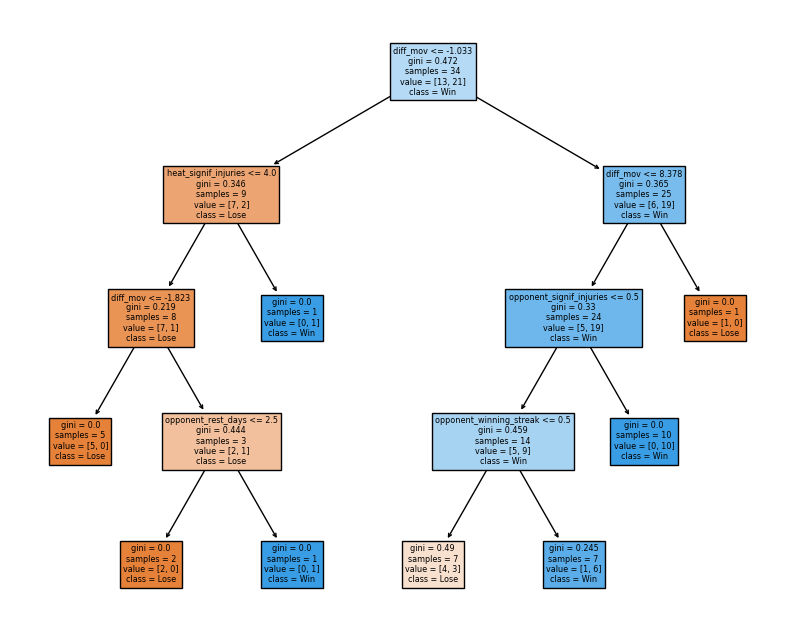

In [8]:
plt.figure(figsize=(10, 8))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=["Lose", "Win"])
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



# Create the random forest classifier with the decision tree classifier as the base estimator
rfc = RandomForestClassifier(n_estimators=30, max_depth = 3, random_state = 42)

# Train the random forest classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)


predicted_outcome = rfc.predict(dtc_inputs)
predicted_outcome = rfc.predict(dtc_inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")
y_pred2 = rfc.predict(X_test)


print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("F1 Score: ", f1_score(y_test, y_pred2))
print("Recall Score: ", recall_score(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))

Accuracy: 0.6666666666666666
game prediction:win
Confusion Matrix: 
 [[ 3  6]
 [ 2 13]]
F1 Score:  0.7647058823529413
Recall Score:  0.8666666666666667
Precision Score:  0.6842105263157895


/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/ethanbohm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
